### LightGBM

XGBoost'un eğitim süresi performansını arttırmaya yönelik geliştirilen bir diğer GBM türüdür.

Level-wise büyütme stratejisi yerine Leaf-wise büyütme stratejisi ile daha hızlıdır.

In [23]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_validate, GridSearchCV
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("diabetes.csv")

In [7]:
y = df['Outcome']
X = df.drop(['Outcome'], axis=1)

In [8]:
lgbm_model = LGBMClassifier(random_state=17)
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 17,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [9]:
cv_results = cross_validate(lgbm_model,X,y,cv=5,scoring=["accuracy","f1","roc_auc"])

In [10]:
cv_results['test_accuracy'].mean()

0.7474492827434004

In [11]:
cv_results['test_f1'].mean()

0.624110522144179

In [12]:
cv_results["test_roc_auc"].mean()

0.7990293501048218

In [14]:
lgbm_params = {"learning_rate":[0.1,0.01],
                  
                  "n_estimators":[100,300,500,1000],
                  "colsample_bytree":[0.5,0.7,1]}

In [15]:
lgbm_best_grid = GridSearchCV(lgbm_model,lgbm_params,cv=5,n_jobs=-1,verbose=True).fit(X,y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [16]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_,random_state=17).fit(X,y)

In [17]:
cv_results = cross_validate(lgbm_final,X,y,cv=5,scoring=["accuracy","f1","roc_auc"])

In [18]:
cv_results['test_accuracy'].mean()

0.7643578643578645

In [19]:
cv_results["test_f1"].mean()

0.6372062920577772

In [20]:
cv_results["test_roc_auc"].mean()

0.8147491264849755

In [21]:
lgbm_best_grid.best_params_

{'colsample_bytree': 1, 'learning_rate': 0.01, 'n_estimators': 300}

In [ ]:
# En iyi parametrelere göre tekrar GridSearchCV ile hiperparametre optimizasyonu yapabiliriz.

In [22]:
# Feature Importance bölümü

In [24]:
def plot_importance(model,features,num=len(X),save=False):
    feature_imp = pd.DataFrame({"Value": model.feature_importances_,"Feature": features.columns})
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1)
    sns.barplot(x="Value",y="Feature",data=feature_imp.sort_values(by="Value",ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    
    if save:
        plt.savefig("importances.png")

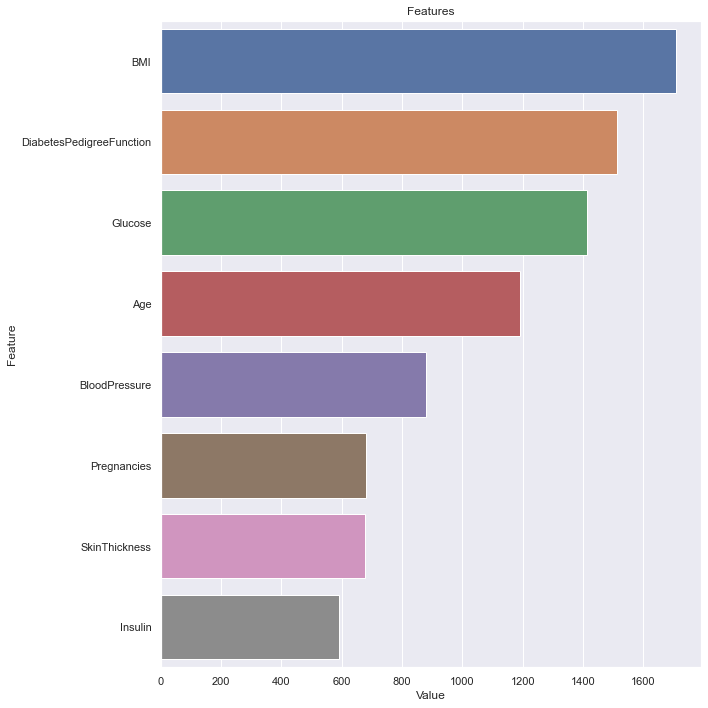

In [26]:
plot_importance(lgbm_final,X)